In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


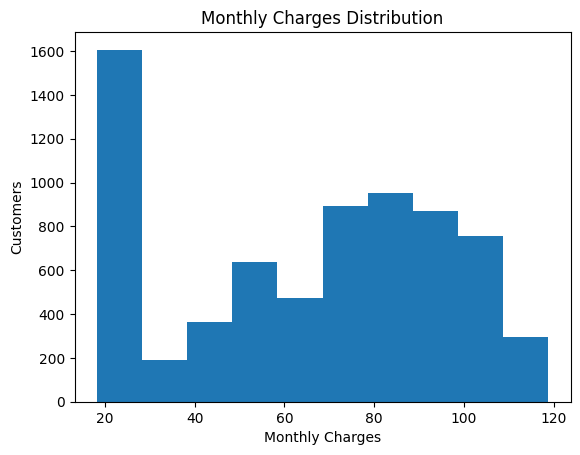

In [ ]:
# Monthly Charges Distribution
plt.hist(df['MonthlyCharges'])
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.show()

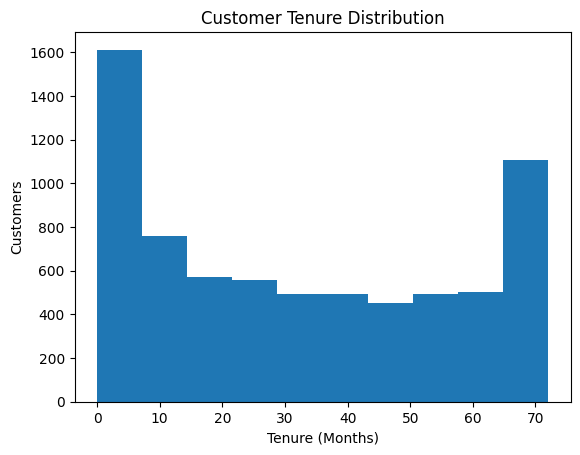

In [ ]:
#Customer Tenure Distribution
plt.hist(df['tenure'])
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Customers")
plt.show()

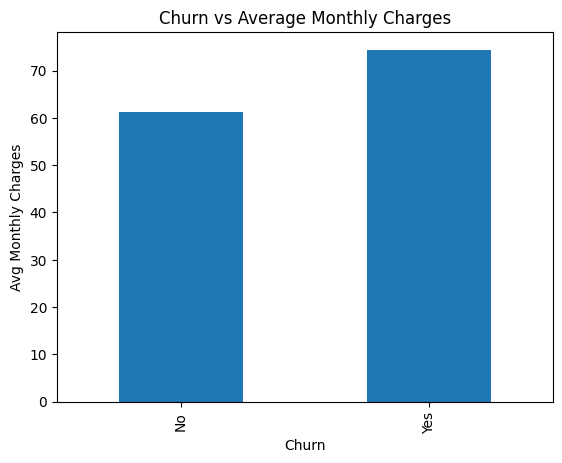

In [ ]:
# 📊 Bivariate Analysis (Churn vs Features)

#  Churn vs Monthly Charges
df.groupby("Churn")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Churn vs Average Monthly Charges")
plt.ylabel("Avg Monthly Charges")
plt.show()

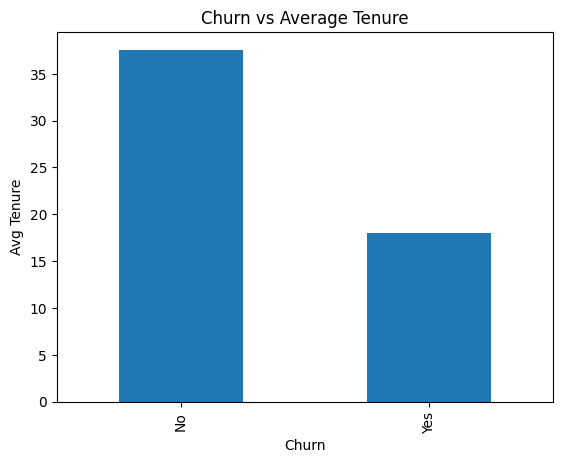

In [ ]:
#Churn vs Tenure
df.groupby("Churn")["tenure"].mean().plot(kind="bar")
plt.title("Churn vs Average Tenure")
plt.ylabel("Avg Tenure")
plt.show()

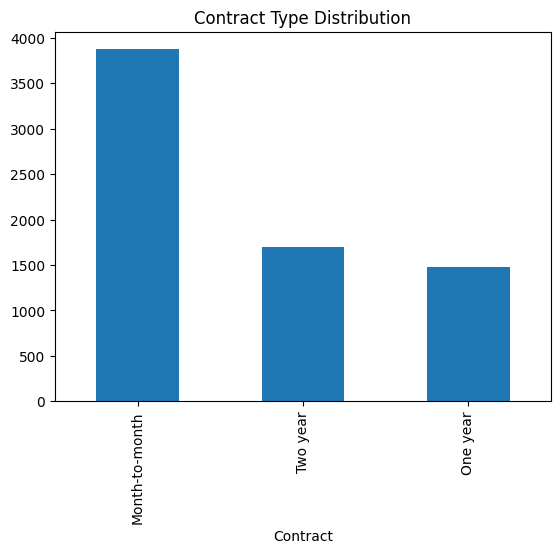

In [ ]:
# Categorical Analysis

# 8.1 Contract Type
df["Contract"].value_counts().plot(kind="bar")
plt.title("Contract Type Distribution")
plt.show()








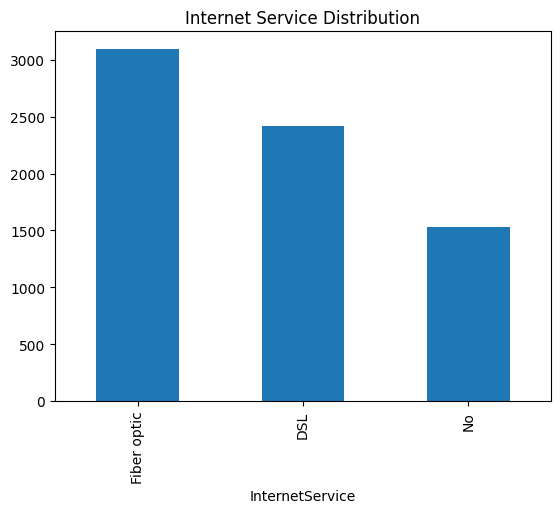

In [ ]:
#Internet Service
df["InternetService"].value_counts().plot(kind="bar")
plt.title("Internet Service Distribution")
plt.show()


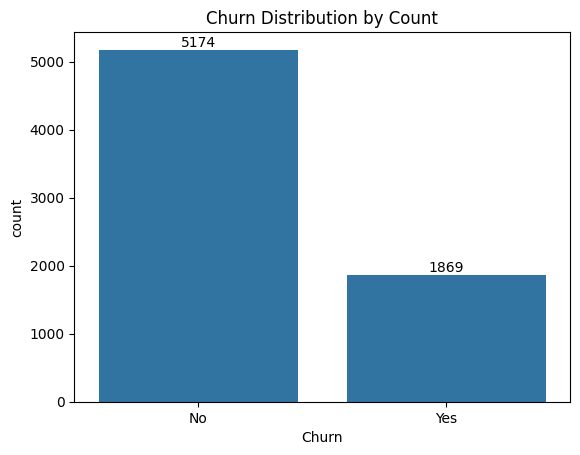

In [ ]:
#  Overall Churn Distribution

ax = sns.countplot(x="Churn", data=df)
ax.bar_label(ax.containers[0])
plt.title("Churn Distribution by Count")
plt.show()

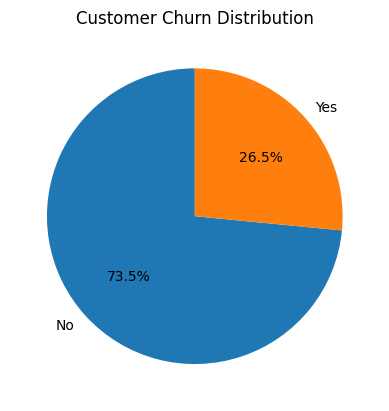

In [ ]:
# Churn Percentage Breakdown
df["Churn"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Customer Churn Distribution")
plt.ylabel("")
plt.show()

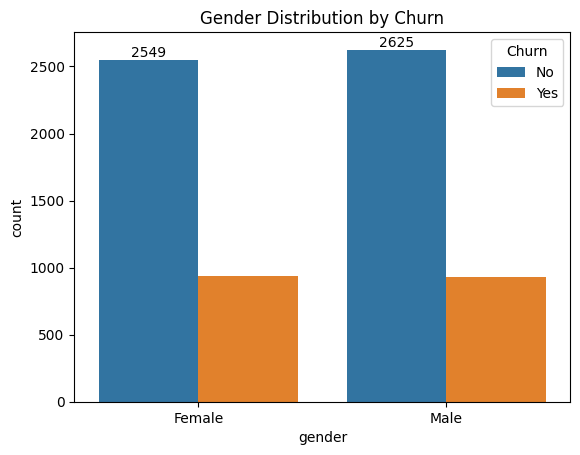

In [ ]:
#  Gender-wise Churn Analysis
ax = sns.countplot(x="gender", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution by Churn")
plt.show()

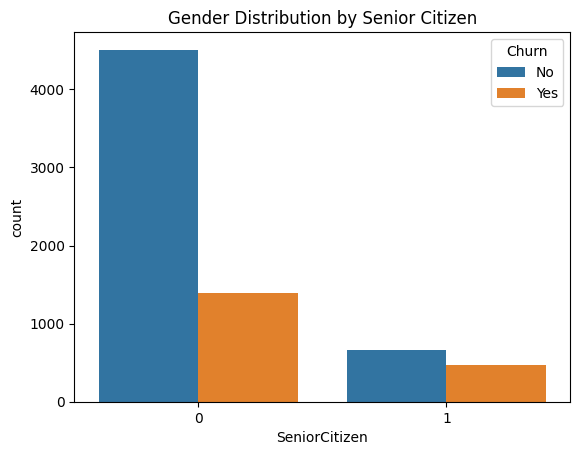

In [ ]:
#  Gender vs Senior Citizen Distribution
sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
plt.title("Gender Distribution by Senior Citizen")
plt.show()

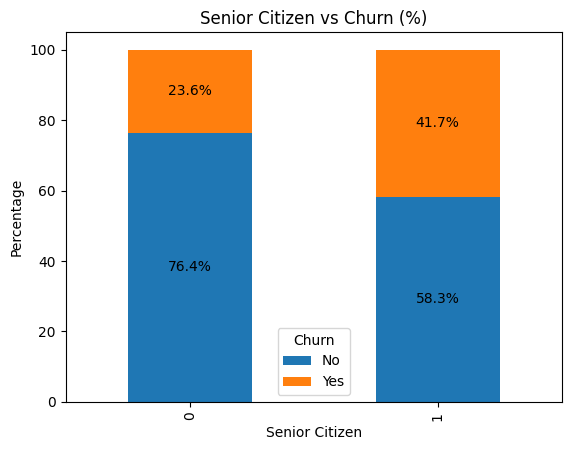

In [ ]:
#Senior Citizen Impact on Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# 2. Plot the stacked bar chart
ax = ct.plot(kind='bar', stacked=True)

# 3. Add title and labels
plt.title("Senior Citizen vs Churn (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")

# 4. Add percentage labels on the bars
for idx, row in ct.iterrows():
    cumulative = 0
    for churn_value in ct.columns:
        value = row[churn_value]
        if value > 0:
            x_pos = ct.index.get_loc(idx)
            plt.text(
                x_pos,
                cumulative + (value / 2),
                f"{value:.1f}%",
                ha='center',
                va='center'
            )
        cumulative += value

plt.legend(title="Churn")
plt.show()



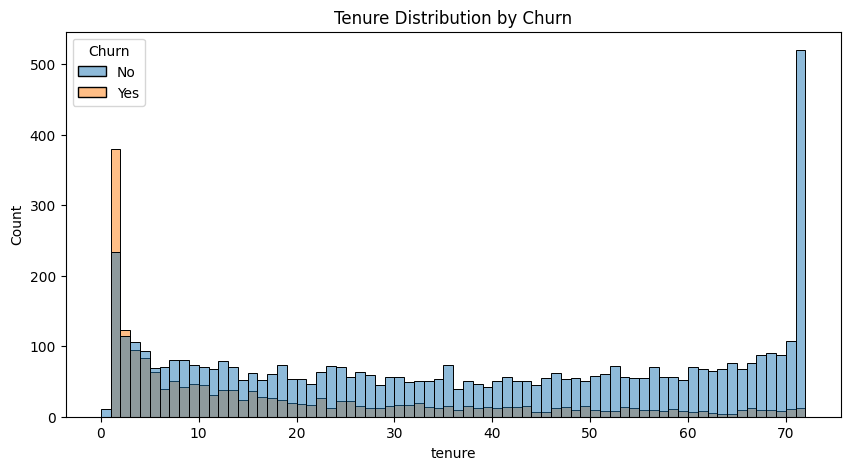

In [ ]:
#Tenure Analysis — The Loyalty Factor
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="tenure", bins=72, hue="Churn")
plt.title("Tenure Distribution by Churn")
plt.show()


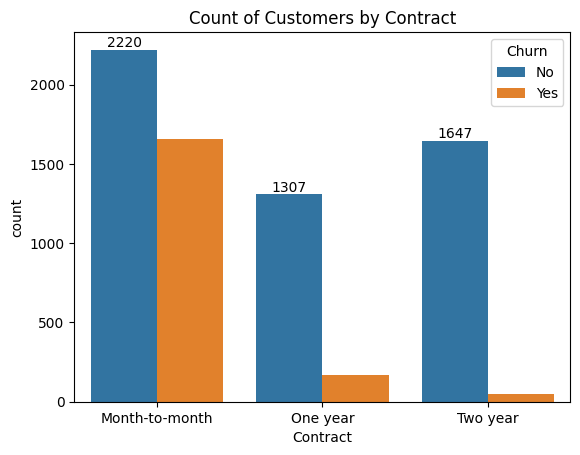

In [ ]:
## Contract Type vs Churn
ax = sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

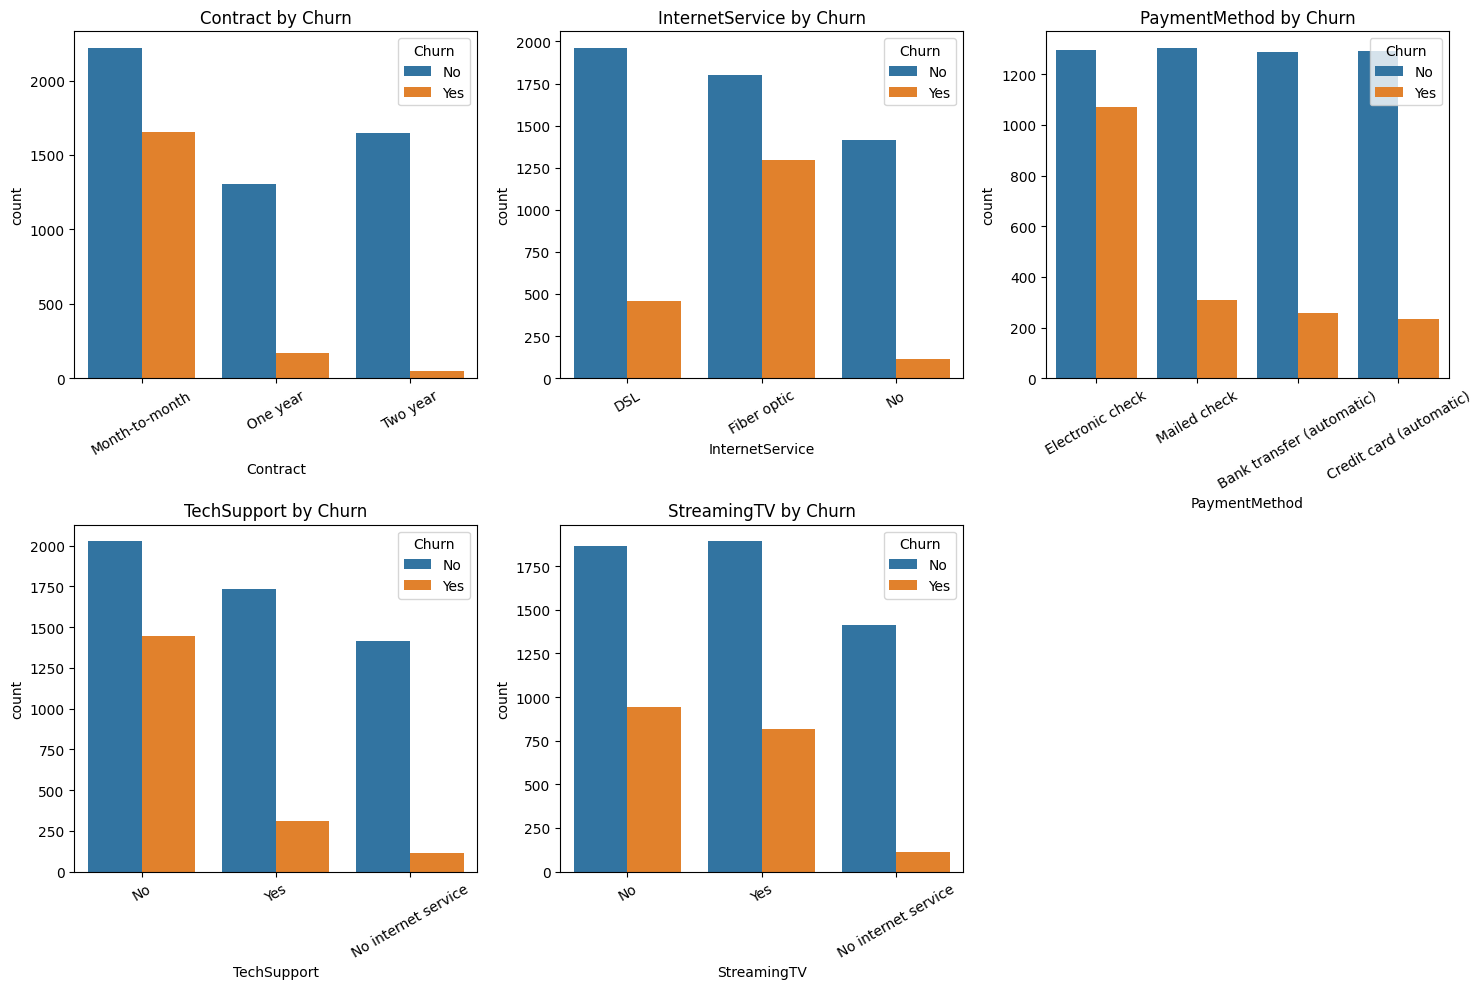

In [ ]:
#  Combined Visual Overview
cols = [
    "Contract",
    "InternetService",
    "PaymentMethod",
    "TechSupport",
    "StreamingTV"
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, hue="Churn")
    plt.xticks(rotation=30)
    plt.title(f"{col} by Churn")

plt.tight_layout()
plt.show()



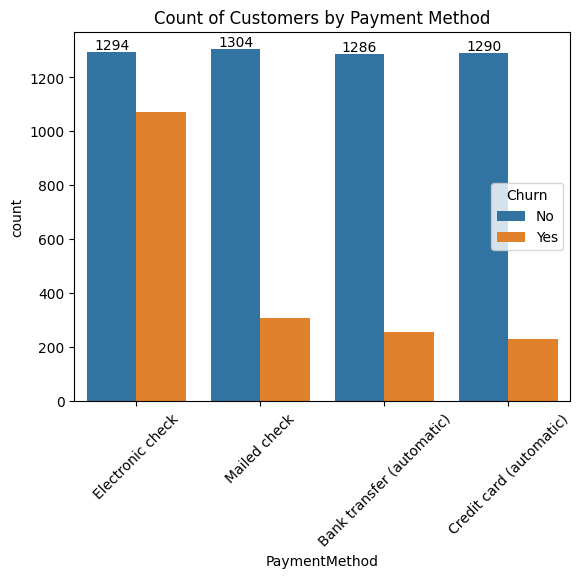

In [ ]:
#  Payment Method & Churn
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

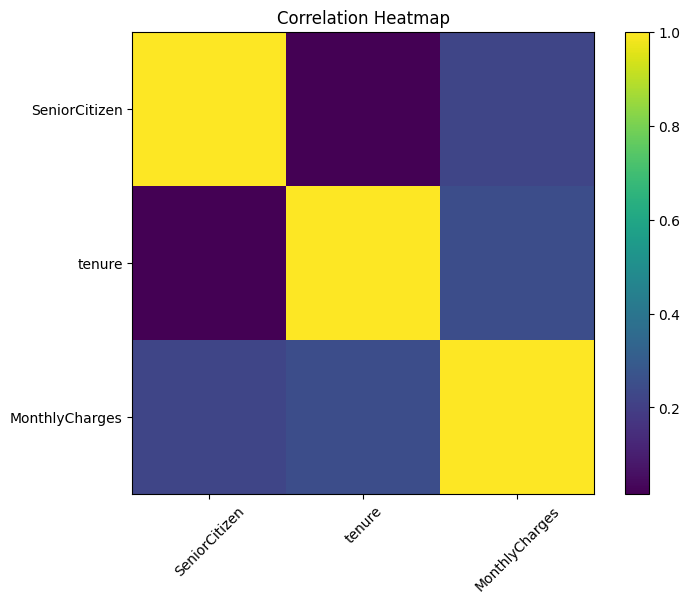

In [ ]:
#  Correlation Analysis (Heatmap using matplotlib)
num_cols = df.select_dtypes(include="number").columns
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="viridis")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.show()